In [2]:
# Let's grab the famous MNIST dataset

from sklearn.datasets import fetch_openml
mnist = fetch_openml('mnist_784', version=1)

In [3]:
mnist.keys()

dict_keys(['data', 'target', 'frame', 'feature_names', 'target_names', 'DESCR', 'details', 'categories', 'url'])

In [5]:
# Data structure for Scikit-Learn datasets include:
# DESCR key - description
# data - one row per instance and column per feature
# target key - labels

X, y = mnist['data'], mnist['target']
print(X.shape)
print(y.shape)

(70000, 784)
(70000,)


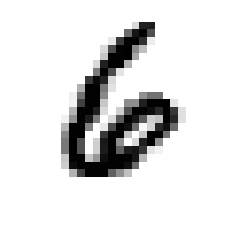

In [34]:
# each image is a 28 * 28 photo, hence each feature is a flattened array of the photo 
# with the data being the intensity (white -> black)

import matplotlib as mpl
import matplotlib.pyplot as plt

first_instance = X[13]
unflattened_instance = first_instance.reshape(28,28)

plt.imshow(unflattened_instance, cmap='binary')
plt.axis('off')
plt.show()

In [10]:
y[0]

'5'

In [12]:
import numpy as np
y = y.astype(np.uint8)
y[0]

5

In [13]:
# Let's split our sets before we get going
X_train, y_train, X_test, y_test = X[:6000], y[:6000], X[6000:], y[6000:]

In [18]:
# Let's start with 1 digit, let's say 6.
# And because I want to test how well it does, I am going to grab 9 too ;)

y_train_6 = (y_train == 6)
y_train_9 = (y_train == 9)
y_test_6 = (y_test == 6)
y_test_9 = (y_test == 9)

In [35]:
# Stochastic Gradient Decent or SGD is a good place to start. This works by creating an error function,
# And then moving down the error curve by tweaking weights in order to arrive at a function that 
# minimizes error and maximizes correctness.

from sklearn.linear_model import SGDClassifier

sgd_6 = SGDClassifier(random_state=23)

In [36]:
sgd_6.fit(X_train, y_train_6)

SGDClassifier(alpha=0.0001, average=False, class_weight=None,
              early_stopping=False, epsilon=0.1, eta0=0.0, fit_intercept=True,
              l1_ratio=0.15, learning_rate='optimal', loss='hinge',
              max_iter=1000, n_iter_no_change=5, n_jobs=None, penalty='l2',
              power_t=0.5, random_state=23, shuffle=True, tol=0.001,
              validation_fraction=0.1, verbose=0, warm_start=False)

In [38]:
sgd_6.predict([X[13]])

array([ True])

In [40]:
# Let's try against a 9
sgd_6.predict([X[4]])

array([False])

In [42]:
# Let's Evaluate the model
from sklearn.model_selection import cross_val_score

In [43]:
cross_val_score(sgd_6, X_train, y_train_6, cv=3, scoring='accuracy')

array([0.9685, 0.978 , 0.977 ])

In [44]:
# This can be misleading. If you take a dataset that is 10% 6, 
# and always guess false, you will be right 90% of the time

In [49]:
# Let's create a confusion matrix.
# for this we need to see the predictions, not the scores

from sklearn.model_selection import cross_val_predict

y_train_pred = cross_val_predict(sgd_6, X_train, y_train_6, cv=3)
y_train_pred

array([False, False, False, ..., False,  True, False])

In [51]:
from sklearn.metrics import confusion_matrix
confusion_matrix(y_train_6, y_train_pred)

#row = actual class
#column = predicted class

# Non 5 correct  |  Non 5 - incorrect
# 5 incorrect    |  5 correct

array([[5284,  108],
       [  45,  563]])

In [53]:
# Precision is a metric based on this matrix
# True positive / (True positives + False Positives) -> Can be gamed with 1 single correct prediction
# Recall is a metric based on this matrix
# True positive / (True positives + False Negatives)

from sklearn.metrics import precision_score, recall_score

print(precision_score(y_train_6, y_train_pred))
print(recall_score(y_train_6, y_train_pred))



0.8390461997019374
0.9259868421052632


In [56]:
# When it classifies as a 6, it is correct 84%
# It detects 93% of 6s

# Let's combine these into one metric, the F Score
# Harmonic mean of both (more weight to low score, so to maximize F both numbers need to be high)

from sklearn.metrics import f1_score
f1_score(y_train_6, y_train_pred)

0.8803752931978107

### Understanding Precision/Recall